In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import  linear_model
from sklearn.utils import shuffle

In [86]:
readed_data=pd.read_csv("/content/Housing.csv")
readed_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Converting  yes to 1 and no to 0
 

In [87]:

readed_data["mainroad"]= readed_data["mainroad"].map({"yes":1,"no":0})
readed_data["guestroom"]= readed_data["guestroom"].map({"yes":1,"no":0})
readed_data["basement"]= readed_data["basement"].map({"yes":1,"no":0})
readed_data["hotwaterheating"]= readed_data["hotwaterheating"].map({"yes":1,"no":0})
readed_data["airconditioning"]= readed_data["airconditioning"].map({"yes":1,"no":0})
readed_data["prefarea"]= readed_data["prefarea"].map({"yes":1,"no":0})
readed_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [90]:
status=pd.get_dummies(readed_data["furnishingstatus"],drop_first=1)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [91]:
filtered_data=pd.concat([readed_data,status],axis=1)
filtered_data.drop(["furnishingstatus"],axis=1,inplace=True)
filtered_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# **Converting All the values from 1 to 0**

In [92]:
def convertingValues(x):
  return ((x-np.min(x))/(max(x)-min(x)))
filtered_data=filtered_data.apply(convertingValues)
filtered_data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0


In [93]:
x=np.array(filtered_data.drop(["price"],axis=1))
y=np.array(readed_data["price"])

In [94]:
x_train, x_test, y_train ,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1)

In [97]:
model=sklearn.linear_model.LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.705246522836573

# Difference between prediction and actual value

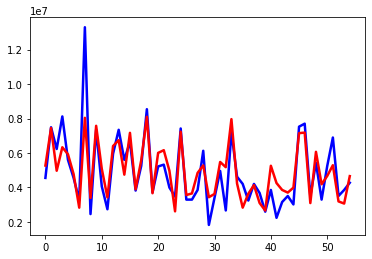

In [98]:
fig=plt.figure()
plt.plot(y_test ,color="blue",linewidth=2.5,linestyle="-")
plt.plot(y_pred ,color="red",linewidth=2.5,linestyle="-")

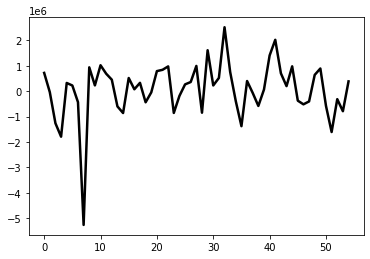

In [99]:
fig=plt.figure()
plt.plot(y_pred-y_test ,color="black",linewidth=2.5,linestyle="-")